<a href="https://colab.research.google.com/github/Nazly725/Talento_Tech_Nazly_Lopez/blob/main/Paquetes_de_Phyton_sesion_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install textblob
!pip install googletrans==3.1.0a0

In [2]:
import pandas as pd
from textblob import TextBlob
from googletrans import Translator

In [5]:
def translateComment(strComment:str):
    translator = Translator()
    strEngComment = translator.translate(strComment, src="es", dest="en")
    return strEngComment.text

def getPolarity(strComment:str):
    strComment = translateComment(strComment)
    analysis = TextBlob(strComment)
    return analysis.sentiment.polarity

In [6]:
# Cargamos el dataset
df = pd.read_csv('/content/Comentarios.csv')
df['polaridad'] = df['Comentario'].apply(getPolarity)




df.to_csv('resultados.csv', index=False)

In [7]:
df = pd.read_csv('/content/resultados.csv')
display(df)

,Comentario,polaridad
0,La comida fue excelente y el servicio fue exce...,0.555556
1,El ambiente era agradable y la comida estaba d...,0.261458
2,"La comida estaba bien, pero el servicio fue le...",0.200000
3,"No me gustó la comida, estaba fría y el sabor ...",-0.475000
4,El peor restaurante en el que he estado. No lo...,-1.000000
...,...,...
66,Siempre disfruto venir aquí. La comida es deli...,0.629167
67,"Buen lugar para cenar, aunque el servicio pued...",0.070833
68,"La comida está bien, pero el ambiente no es mu...",0.208974
69,No me gustó la comida y el servicio fue muy de...,-0.520000


Tambien podemos crear una nube de palabras con aquellas palabras claves que el programa registra

In [8]:
!pip install wordcloud

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

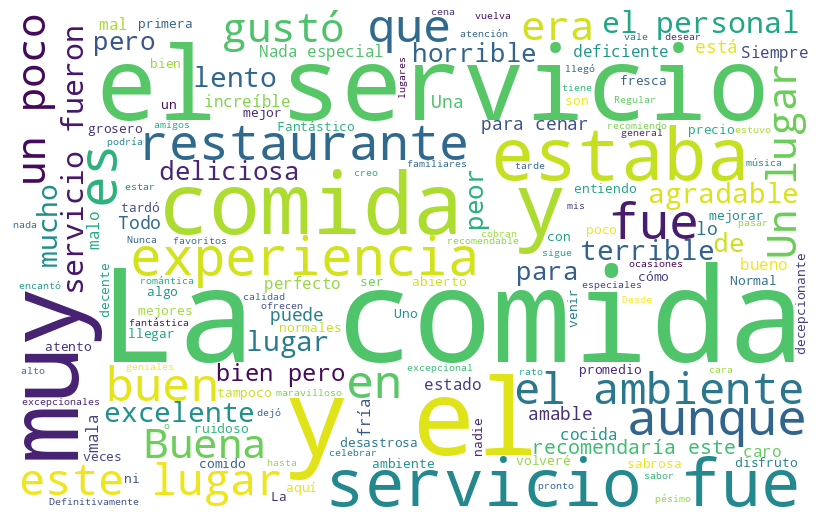

In [11]:
#Combinar todos los comentarios en una sola cadena
text = " ". join(review for review in df.Comentario)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=500, background_color="white").generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10,5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Ahora vamos a crearuna gráfica clasificando el sentimiento

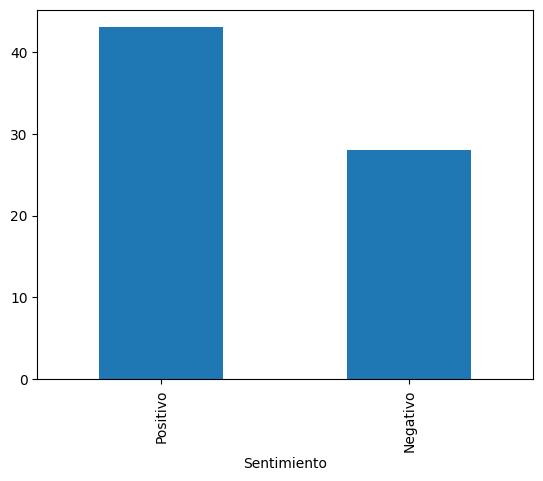

In [12]:
# Función clasificar el sentimiento
def classifySentiment(polarity : float):
    if polarity > 0:
        return 'Positivo'
    elif polarity < 0:
        return 'Negativo'
    else:
        return 'Neutral'

# Leer el archivo CSV
df2 = pd.read_csv('/content/resultados.csv')

# Aplicar la función de clasificación al DataFrame
df2['Polaridad'] = df2['Comentario'].apply(getPolarity)
df2['Sentimiento'] = df2['Polaridad'].apply(classifySentiment)

# Crear una gráfica de barras
sentiment_counts = df2['Sentimiento'].value_counts()
sentiment_counts.plot(kind='bar')

# Mostrar la gráfica
plt.show()

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-18-7d5cebf92349>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0, 0.5, 'Cantidad de comentarios')

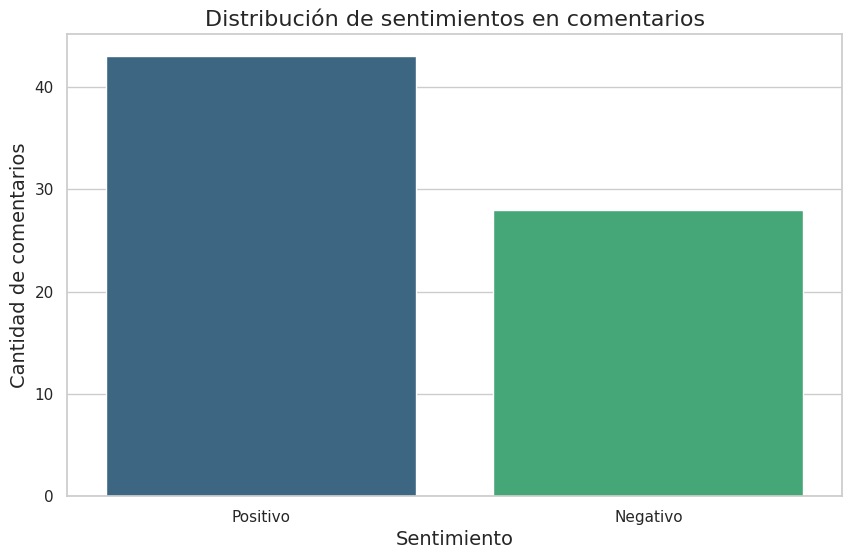

In [18]:
sns.set(style = "whitegrid")

# Cuenta cantidad de comentarios en cada categoria de sentimiento
sentiment_counts = df2['Sentimiento'].value_counts()

# Crea un grafico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title('Distribución de sentimientos en comentarios', fontsize=16)
plt.xlabel('Sentimiento', fontsize = 14)
plt.ylabel('Cantidad de comentarios', fontsize = 14)
